## ML - Análise das Ações da Apple
## Autor: Eduardo Lima Vital

#Análise do Comportamento das Ações da Apple

Este notebook tem como objetivo analisar o histórico de preços das ações da Apple, identificando padrões de comportamento como crescimento, queda ou estabilidade. Utilizaremos técnicas de machine learning para criar um modelo capaz de classificar os movimentos das ações com base nos dados de alta, baixa e variação.

## Contexto do Problema
Investir no mercado de ações exige uma compreensão profunda do comportamento dos preços. Neste projeto, exploramos como os algoritmos de machine learning podem ser aplicados para prever tendências nas ações da Apple. Para isso, seguimos as etapas fundamentais da Engenharia de Sistemas de Software Inteligentes, aprendidas na disciplina correspondente.

## Etapas do Projeto
Carga e Tratamento dos Dados: Os dados históricos das ações da Apple foram carregados e pré-processados para remover valores nulos e possíveis outliers que poderiam distorcer a análise.

Separação entre Treino e Teste (Holdout): Dividimos os dados em conjuntos de treino e teste para avaliar o desempenho do modelo.

Transformação de Dados: Normalizamos e padronizamos os dados para garantir que todas as features tenham a mesma escala e contribuam igualmente para o modelo.

Modelagem: Utilizamos diferentes algoritmos de machine learning - KNN, Árvore de Classificação, Naive Bayes e SVM - para treinar modelos de classificação com os dados.

Otimização de Hiperparâmetros: Buscamos os melhores hiperparâmetros para cada algoritmo usando técnicas de otimização.

Avaliação e Comparação de Modelos: Avaliamos a performance dos modelos usando métricas apropriadas e comparamos os resultados para determinar o mais eficaz.

Exportação do Modelo: Finalmente, exportamos o modelo resultante para utilização futura.

## Implementação em Python com Scikit-Learn
Todo o código foi desenvolvido em Python utilizando a biblioteca Scikit-Learn para construção dos modelos de machine learning. Além disso, foram aplicadas boas práticas de codificação, seguindo os conceitos da disciplina de Programação Orientada a Objetos para garantir a legibilidade e manutenibilidade do código.

Este notebook serve como um relatório detalhado das etapas seguidas, oferecendo uma visão clara do processo de resolução do problema, desde a análise exploratória dos dados até a construção e avaliação dos modelos.

Esse texto pode ser utilizado como introdução para o notebook no Google Colab, fornecendo uma visão geral do objetivo, do contexto do problema e das etapas realizadas no projeto de análise das ações da Apple.

---



In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/vitaledu/dataset_MVP_SI_AAPL_ML/main/AAPL.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

def normalize(value):
    if value > 400623065:
        return 1
    else:
        return 0

# Aplicar a função à coluna de número 6 do dataset
dataset.iloc[:, 6] = dataset.iloc[:, 6].apply(normalize)

# Remove as linhas com valores NaN
dataset = dataset.dropna()

# Mostra as primeiras linhas do dataset
dataset.head(40)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,1
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,1
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,1
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,1
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,1
5,2000-01-10,0.910714,0.912946,0.845982,0.872768,0.739828,1
6,2000-01-11,0.856585,0.887277,0.808036,0.828125,0.701985,1
7,2000-01-12,0.848214,0.852679,0.772321,0.778460,0.659885,1
8,2000-01-13,0.843610,0.881696,0.825893,0.863839,0.732259,1
9,2000-01-14,0.892857,0.912946,0.887277,0.896763,0.760168,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values

# Entrada
X = array[:,1:6] # Todas as colunas exceto a primeira
# Saida
y = array[:,6] # Coluna 7
y = y.astype(float)

print("Valores de entrada X:")
print(X)

print("\nValores de saída y:")
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Valores de entrada X:
[[0.936384 1.004464 0.907924 0.999442 0.847207]
 [0.966518 0.987723 0.90346 0.915179 0.775779]
 [0.926339 0.987165 0.919643 0.928571 0.787131]
 ...
 [190.330002 191.559998 189.229996 191.240005 191.240005]
 [189.979996 190.050003 187.449997 189.429993 189.429993]
 [190.210007 194.399994 190.179993 193.419998 193.419998]]

Valores de saída y:
[1. 1. 1. ... 0. 0. 0.]


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.870222 (0.012359)
CART: 0.846767 (0.012816)
NB: 0.747307 (0.017328)
SVM: 0.751046 (0.021482)


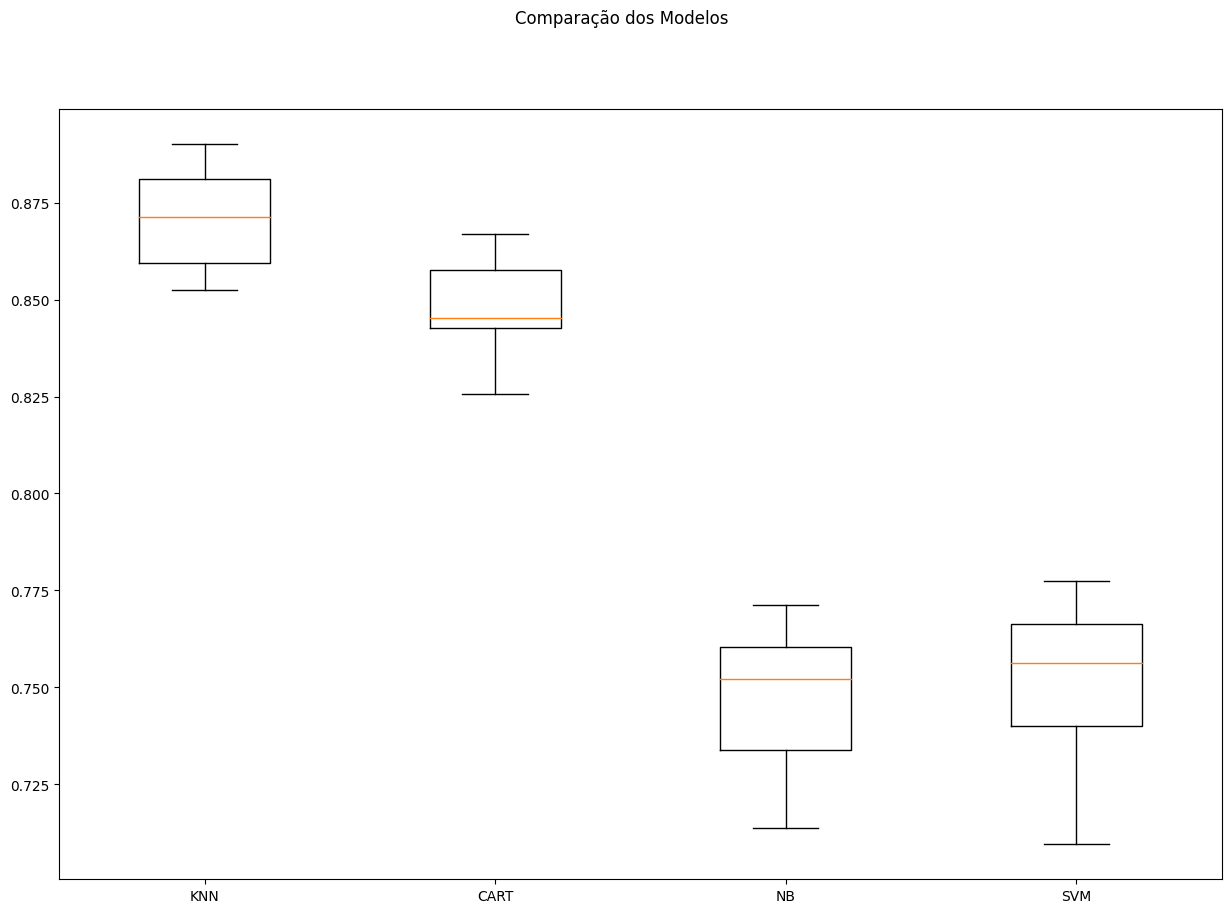

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.870 (0.012)
CART-orig: 0.847 (0.013)
NB-orig: 0.747 (0.017)
SVM-orig: 0.751 (0.021)
KNN-padr: 0.870 (0.013)
CART-padr: 0.843 (0.017)
NB-padr: 0.747 (0.017)
SVM-padr: 0.751 (0.021)
KNN-norm: 0.870 (0.012)
CART-norm: 0.844 (0.012)
NB-norm: 0.747 (0.017)
SVM-norm: 0.751 (0.021)


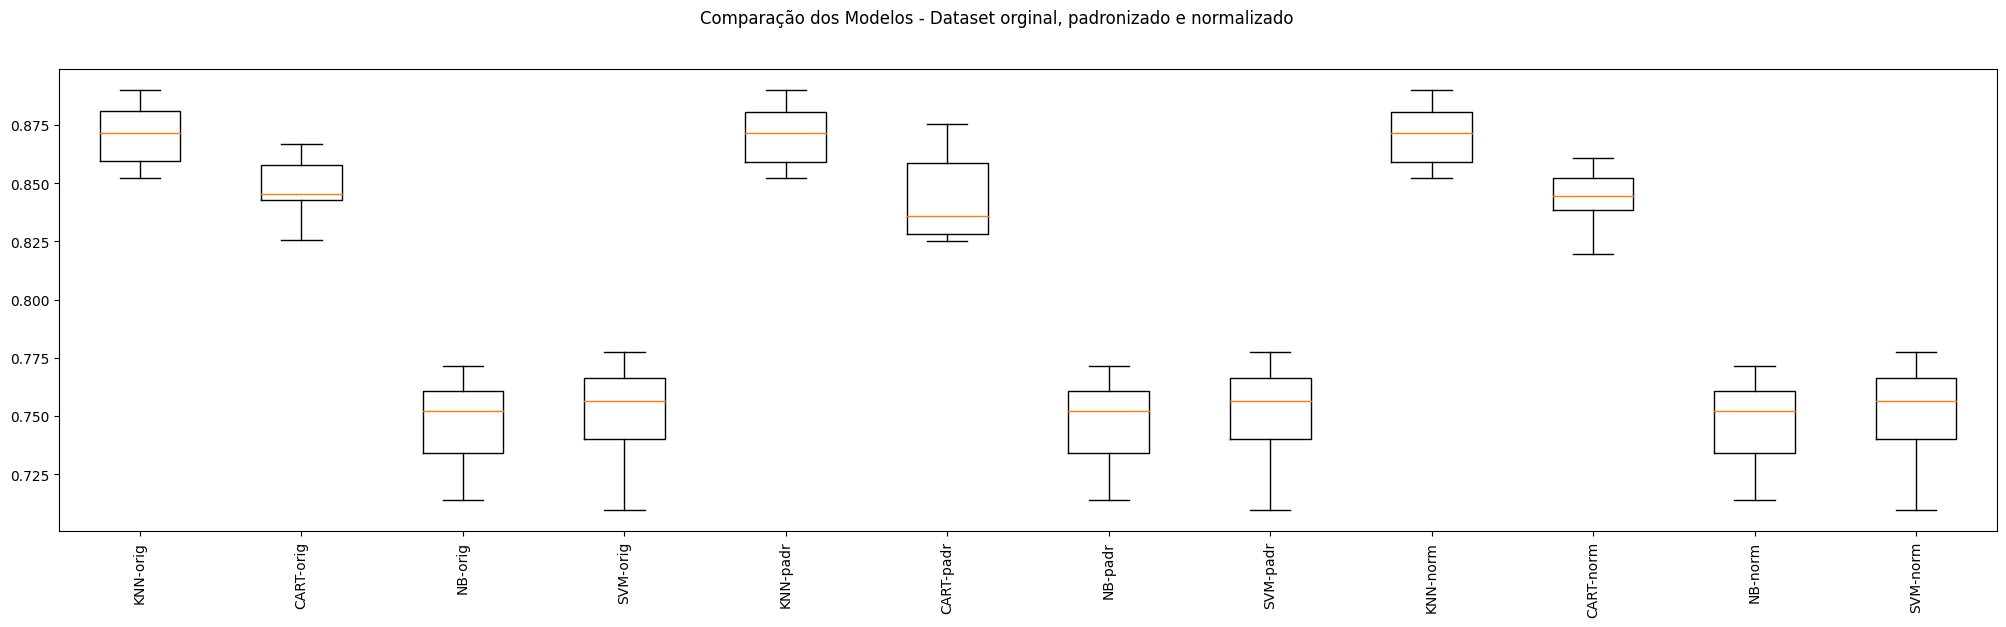

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizadochrome-extension://mcgbeeipkmelnpldkobichboakdfaeon/images/logo-vertical.svg
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.875831 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-padr - Melhor: 0.875416 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}
Sem tratamento de missings: knn-norm - Melhor: 0.875416 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 3}


## Finalização do Modelo

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=3)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8712624584717608


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

## Simulando a aplicação do modelo em dados não vistos

In [ ]:
# Novos dados - não sabemos a classe!

data = {'Open':  [0.503348, 1.028460, 0.146763],
        'High': [0.517857, 1.031250, 0.141183],
        'Low': [0.453125, 1.010045, 0.141183],
        'Close': [0.459821, 1.025670, 0.156763],
        'Adj Close': [0.389781, 0.869440, 0.107524]
        }

atributos = ['Open', 'High', 'Low', 'Close', 'Adj Close']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:5].astype(float)  # Seleciona todas as 6 colunas

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.69264462 -0.69226097 -0.69344568 -0.69331183 -0.67155678]
 [-0.68221826 -0.68218117 -0.68227166 -0.68208772 -0.66200162]
 [-0.6997248  -0.69965647 -0.69970448 -0.69932325 -0.67717955]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 1.]


**Fazendo o download do arquivo pkl**

In [ ]:
import pickle
from google.colab import files

# Salvar o modelo usando pickle
with open('apple_knn.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

# Baixar o arquivo para o ambiente local
files.download('apple_knn.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Fazendo o download do arquivo joblib**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {'Open':  [0.513345, 0.125568, 0.146763],
        'High': [0.617857, 0.124487, 0.141283],
        'Low': [0.453125, 0.123464, 0.141483],
        'Close': [0.754821, 0.146531, 0.156763],
        'Adj Close': [0.583781, 0.095591, 0.107324]
        }

atributos = ['Open', 'High', 'Low', 'Close', 'Adj Close']
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
New_X_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(New_X_train)

# Salvar o scaler em um arquivo
dump(scaler, 'scaler.joblib')

# Fazer o download do arquivo
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Regressão Linear**

In [ ]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

In [ ]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Salva o modelo no disco
filename = 'apple_lr.pkl'
dump(modelo, open(filename, 'wb'))

**Carrega o modelo**

In [ ]:
# Algum tempo depois...
# Carrega o modelo do disco
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.803156146179402


In [ ]:
# Baixar o arquivo para o ambiente local
files.download('apple_lr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Notebook para gerar os modelos knn, lr e joblib
O Dataset é carregado e recebe um modelo onde o valor de negociação acima da média de ações é alterado para 1 e abaixo para 0.
Exemplo:

Valores de entrada X:

```
Date	         Open	       Low       High	    Low	Close	Adj Close
8	2000-01-13	0.843610	0.881696	0.825893	0.863839	0.732259	1
9	2000-01-14	0.892857	0.912946	0.887277	0.896763	0.760168	0
10	2000-01-18	0.901786	0.946429	0.896763	0.928013	0.786658	1
11	2000-01-19	0.943080	0.970982	0.922991	0.951451	0.806526	1
12	2000-01-20	1.031250	1.084821	1.013393	1.013393	0.859033	1
13	2000-01-21	1.020089	1.020089	0.983817	0.993862	0.842477	1
14	2000-01-24	0.968192	1.006696	0.938616	0.948661	0.804161	1
15	2000-01-25	0.937500	1.010045	0.914063	1.002232	0.849572	1
16	2000-01-26	0.982143	1.019531	0.979911	0.983817	0.833962	0
17	2000-01-27	0.971540	1.008929	0.955357	0.982143	0.832543	0
18	2000-01-28	0.965960	0.989955	0.898438	0.907366	0.769156	1
```

Valores de saída y:

```
[1 0 1 ... 0 0 1]
```

Os dados são analisados e normalizados com 87% de acurácia utilizando KNN.

Na otimização de hiperparametros foi identificado que utilizando KNN com n_neighbors': 3 conseguiriamos uma % melhor, subindo quase 1%.

Resumo de análise dos modelos:

KNN-orig: 0.870 (0.012)
CART-orig: 0.847 (0.013)
NB-orig: 0.747 (0.017)
SVM-orig: 0.751 (0.021)
KNN-padr: 0.870 (0.013)
CART-padr: 0.843 (0.017)
NB-padr: 0.747 (0.017)
SVM-padr: 0.751 (0.021)
KNN-norm: 0.870 (0.012)
CART-norm: 0.844 (0.012)
NB-norm: 0.747 (0.017)
SVM-norm: 0.751 (0.021)

Todos os modelos treinados estão disponíveis para download.